# 拆分训练集和测试集

(6075, 11) (320, 11)


/var/folders/g3/9kgyg0z54nv7fpxy0pgwx0y80000gn/T/ipykernel_2760/3907476029.py:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(e_test[label], shade=True, color="g", label="test_label", alpha=.7)
/var/folders/g3/9kgyg0z54nv7fpxy0pgwx0y80000gn/T/ipykernel_2760/3907476029.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(e_train[label], shade=True, color="orange", label="train_label", alpha=.7)


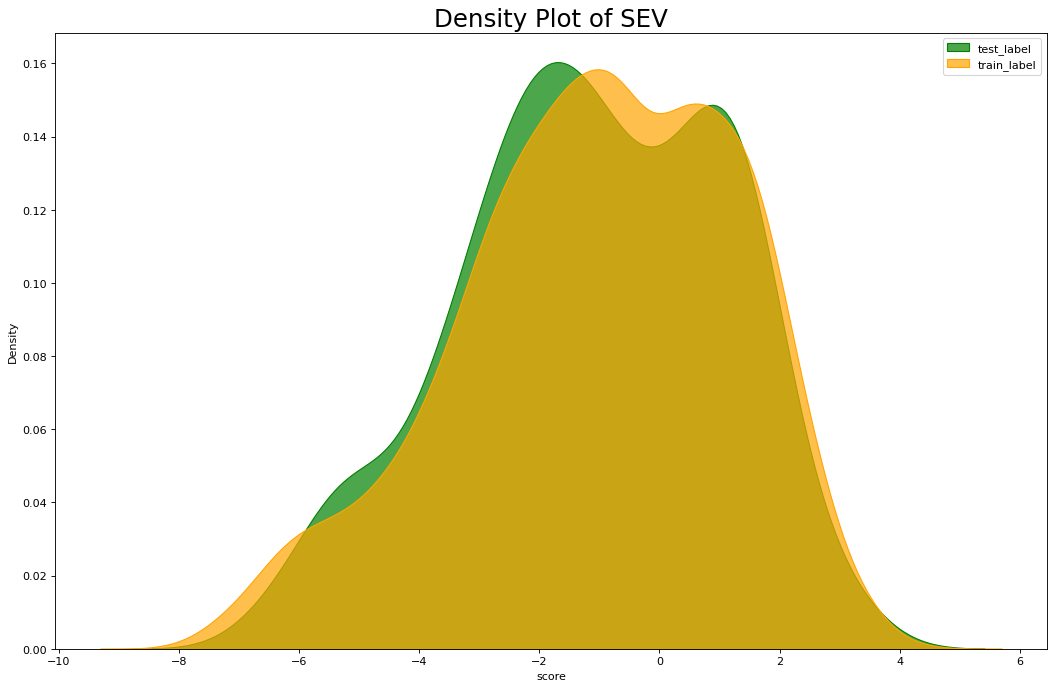

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
# 密度图
datadir = "/Users/john/Desktop/sev"

train_df = pd.read_csv(f"{datadir}/dna240610_rna240611-1_train.csv")
test_df = pd.read_csv(f"{datadir}/dna240610_rna240611-1_test.csv")
df = pd.concat([train_df,test_df])
# df = pd.read_csv("/Users/john/Desktop/sev/DNA_RNA_DAY5.csv")
# df = pd.read_csv("/Users/john/Desktop/sev/dna240610_rna240617-1_score.csv")
# df = pd.read_csv("/Users/john/Desktop/sev/DNA_RNA_DAY5_BARCODE.csv")

# df["seq"] =df["dna_seq"]
df["abs_score"] = df["rna_counts"]/df["plasmid_counts"]
df["score"] = np.log(df["abs_score"])
df["length"] = df["seq"].apply(lambda x:len(x))
df["ttype"] = df["seq"].apply(lambda x:len(x)==118)
# df=df[(df["plasmid_counts"]>=30)&(df["rna_counts"]>=5)]
df=df[(df["plasmid_counts"]>=100)]
# df = df[(df["abs_score"]<=30)&(df["plasmid_counts"]>=20)&(df["length"]<125)&(110<=df["length"])]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.05, random_state=42)
for train_idx, test_idx in split.split(df, df["length"]):
    e_train = df.iloc[train_idx].reset_index(drop=True)
    e_test = df.iloc[test_idx].reset_index(drop=True)
print(e_train.shape, e_test.shape)
# e_train = df.sample(frac=0.95)
# e_test= df[~df.index.isin(e_train.index)]
e_train.to_csv(f"{datadir}/train.csv")
e_test.to_csv(f"{datadir}/test.csv")


# Draw Plot
label = "score" # abs_score,length, score
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(e_test[label], shade=True, color="g", label="test_label", alpha=.7)
sns.kdeplot(e_train[label], shade=True, color="orange", label="train_label", alpha=.7) 
# sns.kdeplot(e_train['score'], shade=True, color="black", label="train_label", alpha=.7)
# sns.kdeplot(e_test['pred'], shade=True, color="dodgerblue", label="test_pred", alpha=.7)

# Decoration
plt.title('Density Plot of SEV', fontsize=22)
plt.legend()
plt.show()

# 评估预测结果

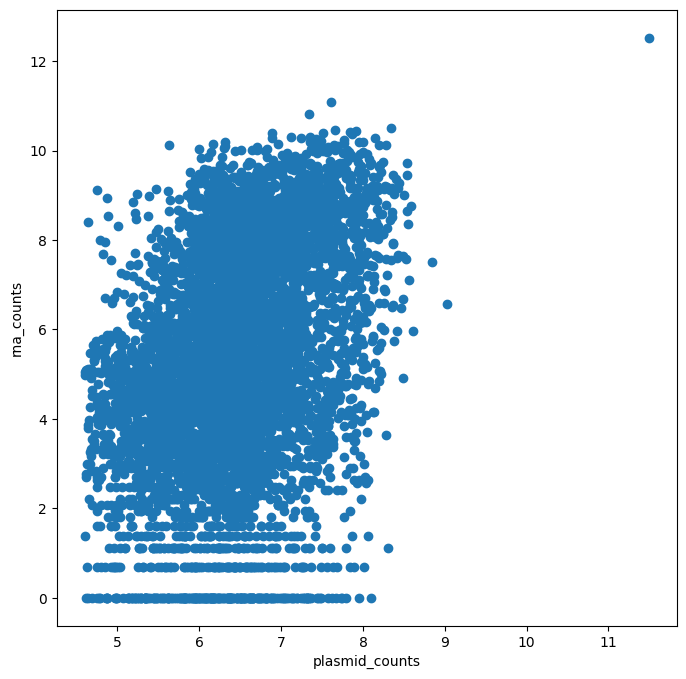

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(np.log(e_train["plasmid_counts"]), np.log(e_train["rna_counts"]), marker='o')
plt.xlabel("plasmid_counts")
plt.ylabel("rna_counts")
plt.show()

In [3]:
import scipy.stats as stats
from sklearn import preprocessing

def r2(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return r_value**2


train_df = pd.read_csv(f"{datadir}/dna240610_rna240611-1_train.csv")
test_df = pd.read_csv(f"{datadir}/dna240610_rna240611-1_test.csv")
day5 = pd.concat([train_df,test_df])
day8 = pd.read_csv("/Users/john/Desktop/sev/dna240610_rna240617-1_score.csv")
day5["abs_score"] = day5["rna_counts"]/day5["plasmid_counts"]
day5["score"] = np.log(day5["abs_score"])
day8["abs_score"] = day8["rna_counts"]/day8["plasmid_counts"]
day8["score"] = np.log(day8["abs_score"])
day5=day5[["seq","score"]].rename(columns={"score":"score_day5"})
day8=day8[["seq","score"]].rename(columns={"score":"score_day8"})
df = pd.merge(day5,day8,on="seq")

r = r2(df["score_day8"],df["score_day5"])
pr =  stats.pearsonr(df["score_day8"],df["score_day5"])
print('test day5, day8 r-squared = ', r, "pearsonR = ", pr[0])


test day5, day8 r-squared =  0.1293710279489212 pearsonR =  0.3596818426733842


In [18]:
train_df = pd.read_csv(f"{datadir}/dna240610_rna240611-2_train.csv")
test_df = pd.read_csv(f"{datadir}/dna240610_rna240611-2_test.csv")
# train_df = pd.read_csv(f"{datadir}/dna240610_rna240611-2_train.csv")
# test_df = pd.read_csv(f"{datadir}/dna240610_rna240611-2_test.csv")
day5 = pd.concat([train_df,test_df])
# day5=day5[(day5["plasmid_counts"]>=100)]
# day8 = pd.concat([train_df,test_df])
# day5 = pd.read_csv("/Users/john/Desktop/sev/dna240610_rna240617-1_score.csv")
day8 = pd.read_csv("/Users/john/Desktop/sev/dna240610_rna240617-2_score.csv")
day5["abs_score"] = day5["rna_counts"]/day5["plasmid_counts"]
day5["score"] = np.log(day5["abs_score"])
day8["abs_score"] = day8["rna_counts"]/day8["plasmid_counts"]
day8["score"] = np.log(day8["abs_score"])
day5=day5[["seq","score"]].rename(columns={"score":"score_day5"})
day8=day8[["seq","score"]].rename(columns={"score":"score_day8"})
df = pd.merge(day5,day8,on="seq")

r = r2(df["score_day8"],df["score_day5"])
pr =  stats.pearsonr(df["score_day8"],df["score_day5"])
print('test day5 rna1 vs rna2: r-squared = ', r, "pearsonR = ", pr[0])

test day5 rna1 vs rna2: r-squared =  0.09373419969933308 pearsonR =  0.30616041497772556


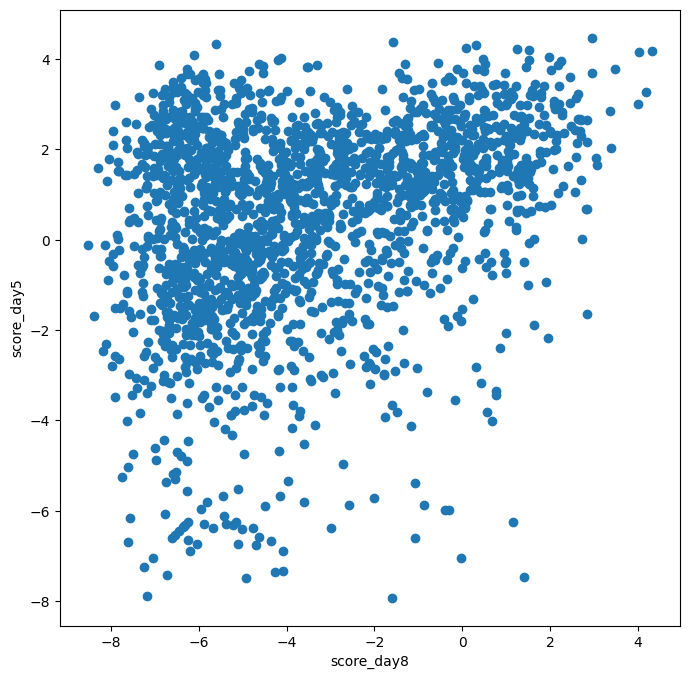

In [19]:
import matplotlib.pyplot as plt

tdf=df
plt.figure(figsize=(8, 8))
plt.scatter(tdf["score_day8"], tdf["score_day5"], marker='o')
plt.xlabel("score_day8")
plt.ylabel("score_day5")
plt.show()

In [13]:
tdf.shape

(1615, 3)